 # Que 1

Predict if a person would buy life insurance based on his age using logistic regression and naive bayes.
About Dataset - Age: Age of a person
bought_insurance : whether person buys Insurance or not (0 - No, 1 - Yes)
predict it for Age : 58,30,20,49,53

Dataset : insurance_data.csv

Calculate Accuracy by confusion matrix, Calculate accuracy score, precision score, recall score, f1 score, roc auc score, precision, recall.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df =  pd.read_csv('./insurance_data.csv')
df.head(5)

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               27 non-null     int64
 1   bought_insurance  27 non-null     int64
dtypes: int64(2)
memory usage: 564.0 bytes


In [5]:
df.describe()

,age,bought_insurance
count,27.000000,27.000000
mean,39.666667,0.518519
std,15.745573,0.509175
min,18.000000,0.000000
25%,25.000000,0.000000
50%,45.000000,1.000000
75%,54.500000,1.000000
max,62.000000,1.000000


In [6]:
df.corr()

,age,bought_insurance
age,1.000000,0.732395
bought_insurance,0.732395,1.000000


<AxesSubplot:>

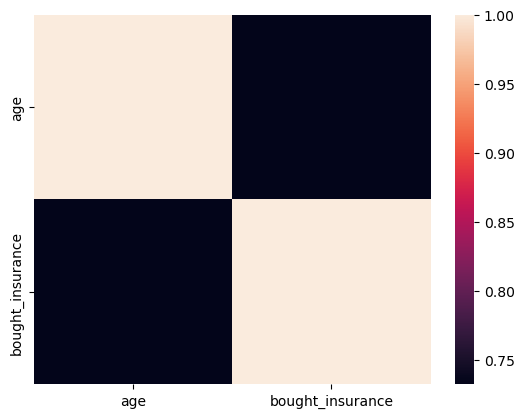

In [7]:
sns.heatmap(df.corr())

In [8]:
x = df.drop('bought_insurance', axis = 1)
y = df['bought_insurance']

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, random_state = 123456)

In [24]:
def build_logistic_regression():
    from sklearn.linear_model import LogisticRegressionCV
    model = LogisticRegressionCV()

    model.fit(x_train, y_train)

    return model

In [25]:
def build_naive_bayes_model():
    from sklearn.naive_bayes import GaussianNB
    
    model = GaussianNB()
    model.fit(x_train, y_train)
    return model

In [26]:
model_lg = build_logistic_regression()
model_nb = build_naive_bayes_model()


In [36]:
age = [58,30,20,49,53]
for i in age:
    X = build_logistic_regression()
    insurance = X.predict([[i]])
    if insurance == 1:
       print("YES, person will buy insurance")
    else:
       print("NO, person will not buy insurance")

YES, person will buy insurance
NO, person will not buy insurance
NO, person will not buy insurance
YES, person will buy insurance
YES, person will buy insurance


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegressionCV was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegressionCV was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegressionCV was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegressionCV was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegressionCV was fitted with feature names
  warnings.warn(


In [33]:
def evaluate_model(model):
    from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
    y_true = y_test
    y_pred = model.predict(x_test)    
    cm = confusion_matrix(y_true, y_pred)
    print(cm)
    print(f"accuracy = {accuracy_score(y_true, y_pred) * 100:.2f}%")
    print(f"precision = {precision_score(y_true, y_pred) * 100:.2f}%")
    print(f"recall = {recall_score(y_true, y_pred) * 100:.2f}%")
    print(f"F1 score = {f1_score(y_true, y_pred) * 100:.2f}%")

In [34]:
evaluate_model(model_lg)

[[3 1]
 [0 5]]
accuracy = 88.89%
precision = 83.33%
recall = 100.00%
F1 score = 90.91%


In [35]:
evaluate_model(model_nb)

[[3 1]
 [0 5]]
accuracy = 88.89%
precision = 83.33%
recall = 100.00%
F1 score = 90.91%
